<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
# Portfolio Assignment 1: Visualisation for Network Traffic Analysis (2022)
---

The completion of this worksheet is worth a **maximum of 20 marks** towards your portfolio assignment for the UFCFEL-15-3 Security Data Analytics and Visualisation (SDAV) module.

### Brief
---

You have been asked to examine a sample of network traffic to investigate suspicious activity on some of the company workstations. The company directors need to be able to understand this data. Your task is to **produce a series of different visual representations to describe and understand the characteristics of the data, based on the task questions below**. You should use the [Matplotlib documentation](https://matplotlib.org/stable/api/index.html) and the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html) to learn about the library functionality, as well as other online resources. 

### Assessment and Marking
---

For each question you will see the maximum number of marks you may be awarded for a complete answer in brackets.

* **Task 1:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)
* **Task 2:** Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)
* **Task 3:** Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)
* **Task 4:** Display a Scatter Chart that shows the association between Source and Destination data. (2)
* **Task 5:** Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)
* **(Advanced) Task 6:** Display a Node Link Diagram for this new DataFrame. (3)
* **(Advanced) Task 7:** For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False. (3)
* **(Advanced) Task 8:** Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

This assignment should be submitted as as PDF to your Blackboard portfolio submission as per the instructions in the assignment specification available on Blackboard. A copy of your work should also be provided via a UWE Gitlab repository, with an accessible link provided with your portfolio.
 
### Contact
---

Questions about this assignment should be directed to your module leader (Phil.Legg@uwe.ac.uk). You can use the Blackboard Q&A feature to ask questions related to this module and this assignment, as well as the on-site teaching sessions.

---

In [1]:
### Load in the libraries and the data
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import sys

# The following line is useful before each plot to increase the default size that it is rendered at:
# plt.figure(figsize=(20,10))

file= r"DATA/T1_data/2022-task1_data.csv"
data= pd.read_csv(file)
data.head()


,No.,Time,Source,Destination,Protocol,Length,Info
0,1,0.000000,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."
1,2,0.000050,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0
2,3,0.000240,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5..."
3,4,0.186710,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...
4,5,1.119689,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ..."


### Task 1: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Number of Packets" sent on the y-axis. (3)

*Hint: The Time column could be grouped by minute by changing the precision of how time is measured.*

In [2]:
data['Time']

0          0.000000
1          0.000050
2          0.000240
3          0.186710
4          1.119689
            ...    
34465    819.314740
34466    820.066244
34467    820.146617
34468    820.224071
34469    820.296219
Name: Time, Length: 34470, dtype: float64

In [3]:
prt = data['Protocol'].value_counts()
prt

SMB         16301
TCP         11885
ARP          4500
LLMNR         614
NBNS          573
SSDP          324
HTTP           85
DHCPv6         57
ICMPv6         47
HTTP/XML       28
SMB2           13
SMB Pipe       12
BROWSER        11
NBSS            8
IGMPv3          8
LANMAN          4
Name: Protocol, dtype: int64

Text(0, 0.5, 'Total Number of Packets')

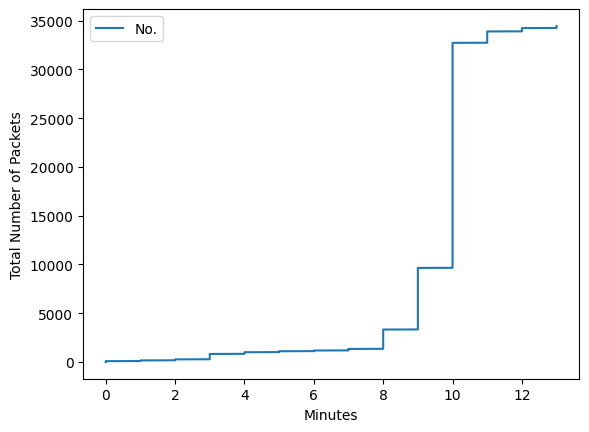

In [4]:
data['Time'] = data['Time'].astype(int)
data['Minutes'] = data['Time']/60
data['Minutes'] = data['Minutes'].astype(int)
df = data.plot.line(x='Minutes', y='No.')
df.set_xlabel("Minutes")
df.set_ylabel("Total Number of Packets")

### Task 2: Plot a Line Chart that shows "Minutes" on the x-axis, and "Total Packet Length" sent on the y-axis. (3)

*Hint: Group you data by "Time" and then you can take the sum of the Length column.*

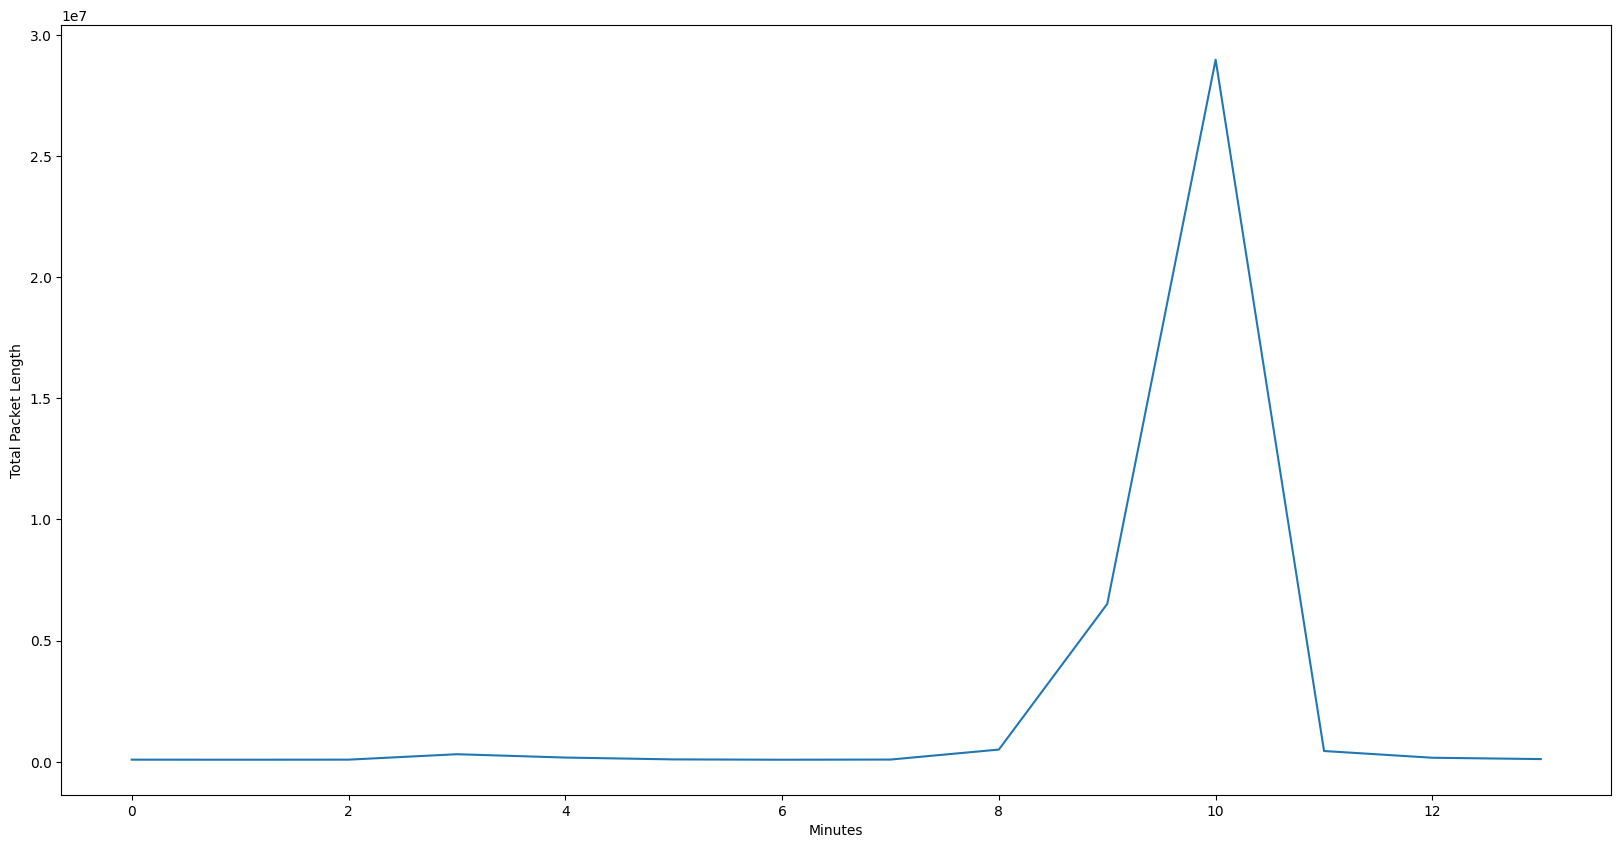

In [5]:
t2_data = pd.DataFrame()
t2_data = data.copy()


t2_data_1 = t2_data.groupby(["Minutes"],sort= False).sum()
plt.figure(figsize=(20,10))
plt.xlabel("Minutes")
plt.ylabel("Total Packet Length")
plt.plot(t2_data_1["Length"])

### Task 3: Display a Bar Chart that shows "Protocol" on the x-axis, and "Count" on the y-axis. (2)

*Hint: Search the pandas documentation for creating a Bar Chart from a DataFrame column.*

In [6]:
b = data["Protocol"].value_counts()
b

SMB         16301
TCP         11885
ARP          4500
LLMNR         614
NBNS          573
SSDP          324
HTTP           85
DHCPv6         57
ICMPv6         47
HTTP/XML       28
SMB2           13
SMB Pipe       12
BROWSER        11
NBSS            8
IGMPv3          8
LANMAN          4
Name: Protocol, dtype: int64

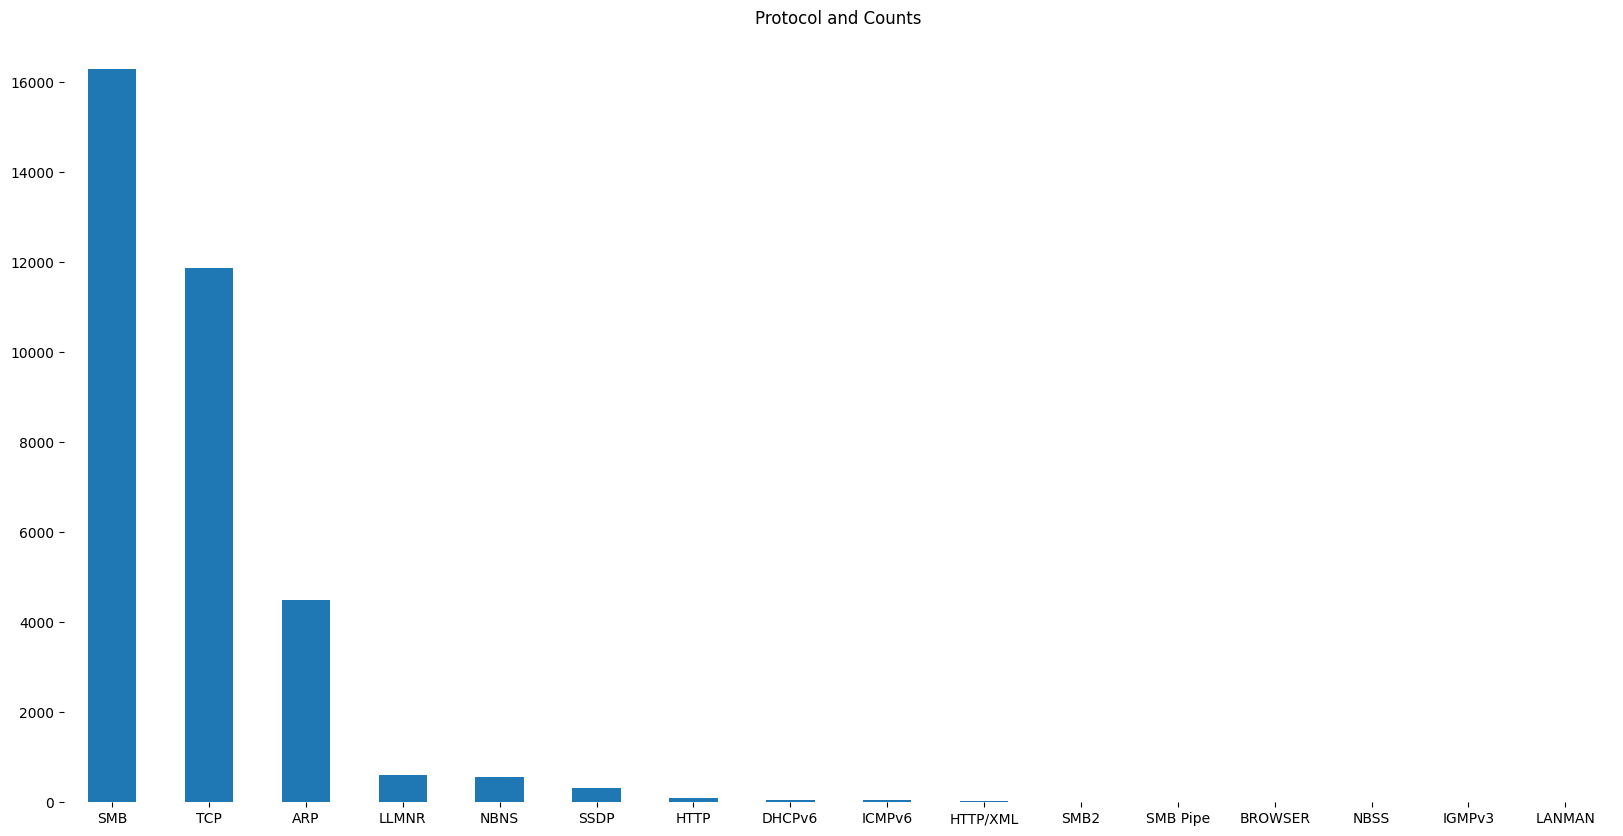

In [7]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# sort by protocol
protocol_ct = pd.value_counts(data['Protocol'])

# plot the data
plt.axes(frameon=0) # reduce chart junk
protocol_ct[:20].plot(kind='bar', 
   rot=0, title="Protocol and Counts", figsize=(20,10)).grid(False)
plt.show()

In [8]:
top10 = pd.value_counts(data['Protocol'])[0:10] 
# calculate the % for each of the top 10
top10.astype(float) / len(data['Protocol'])

SMB         0.472904
TCP         0.344793
ARP         0.130548
LLMNR       0.017813
NBNS        0.016623
SSDP        0.009399
HTTP        0.002466
DHCPv6      0.001654
ICMPv6      0.001364
HTTP/XML    0.000812
Name: Protocol, dtype: float64



### Task 4: Display a Scatter Chart that shows the association between Source and Destination data. (2)

*Hint: Matplotlib has a scatterplot function that takes ***x*** and ***y*** as inputs*

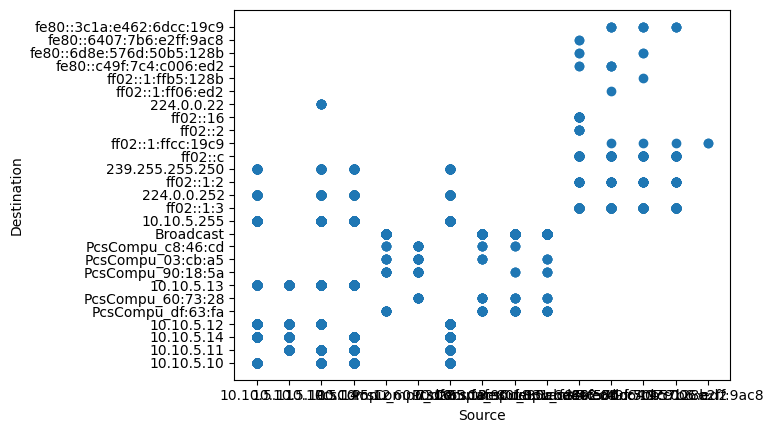

In [9]:
x = data["Source"]
y = data["Destination"]
figsize=(20,10)
plt.xlabel("Source")
plt.ylabel("Destination")
plt.scatter(x,y)

In [10]:
#Since the source axis is hard to read and complicated, I have implemented an another plotting that shows the destinations of each source   

In [12]:
t4_data = data.copy()

x_unique = data["Source"].unique()


#We can change the source and access the destinations of a specific source.
specific_source = t4_data.loc[t4_data["Source"]== '10.10.5.11']
plot1 = specific_source["Source"]
plot2 = specific_source["Destination"]
x_unique

array(['10.10.5.11', '10.10.5.10', '10.10.5.14', '10.10.5.12',
       'PcsCompu_60:73:28', 'PcsCompu_df:63:fa', '10.10.5.13',
       'PcsCompu_90:18:5a', 'PcsCompu_03:cb:a5', 'PcsCompu_c8:46:cd',
       'fe80::3c1a:e462:6dcc:19c9', 'fe80::6d8e:576d:50b5:128b',
       'fe80::c49f:7c4:c006:ed2', 'fe80::6407:7b6:e2ff:9ac8', '::'],
      dtype=object)

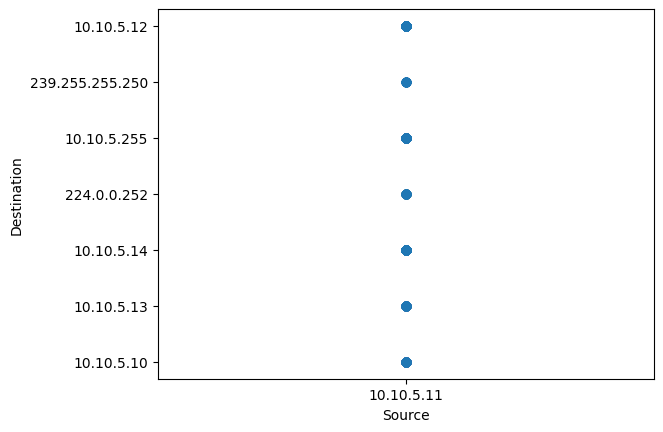

In [13]:
 
figsize=(20,10)
plt.xlabel("Source")
plt.ylabel("Destination")
plt.scatter(plot1,plot2)


In [14]:


### Task 5: Filter the data so that only 10.x.x.x Source addresses are included in a new DataFrame. (1)

#*Hint: Retrieve all rows where the Source string starts with 10.*

In [16]:
import numpy as np
import pandas as pd


wanted = data[data['Source'].str.startswith('10.')]

wanted_sources = wanted['Source']

data['wantedSources'] = wanted_sources

#creating a new dataframe
data_new = pd.DataFrame()
data_new = data.copy()

#dropping the wantedSources column
data = data.drop('wantedSources',axis=1)
#dropping the Sources from the new dataframe
data_new = data_new.drop('Source',axis =1)
data_new = data_new.dropna()
data_new

,No.,Time,Destination,Protocol,Length,Info,Minutes,wantedSources
0,1,0,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.11
1,2,0,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0,10.10.5.10
2,3,0,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0,10.10.5.10
3,4,0,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0,10.10.5.11
4,5,1,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.14
...,...,...,...,...,...,...,...,...
34455,34456,818,10.10.5.10,TCP,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W...",13,10.10.5.13
34456,34457,818,10.10.5.13,TCP,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...,13,10.10.5.10
34457,34458,818,10.10.5.13,TCP,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W...",13,10.10.5.10
34460,34461,818,10.10.5.10,TCP,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...,13,10.10.5.13


### (Advanced) Task 6: Display a Node Link Diagram for this new DataFrame. (3)

*Hint: Look at the NetworkX library: https://networkx.org/ and the online course notes.*

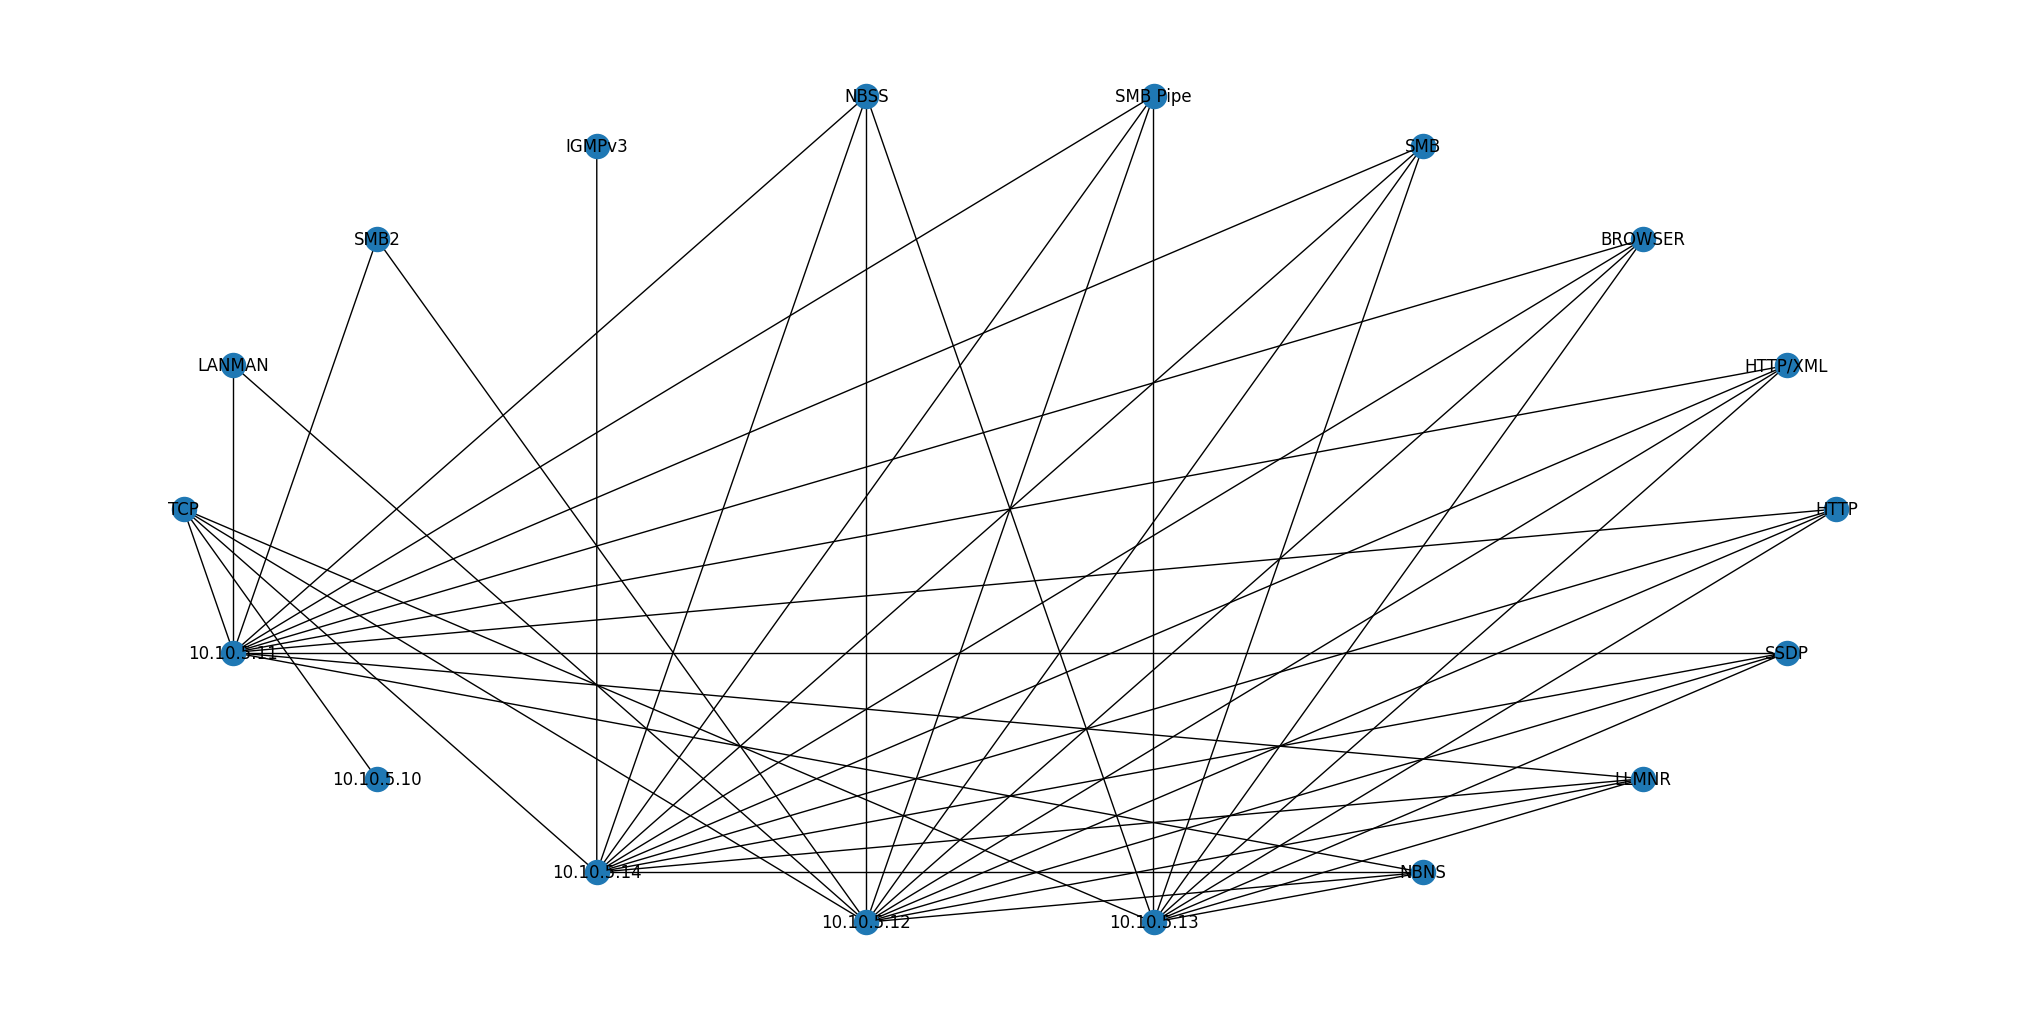

In [17]:
import networkx as nx
from matplotlib.pyplot import figure



G =nx.Graph()
G = nx.from_pandas_edgelist(data_new,'Protocol','wantedSources')

figure(figsize=(20, 10))
nx.draw_shell(G, with_labels=True)
G


In [18]:
#The connnections that node have 
G['10.10.5.11']

AtlasView({'TCP': {}, 'LLMNR': {}, 'NBNS': {}, 'HTTP': {}, 'SSDP': {}, 'HTTP/XML': {}, 'BROWSER': {}, 'SMB': {}, 'SMB Pipe': {}, 'NBSS': {}, 'SMB2': {}, 'LANMAN': {}})

In [19]:
len(G['10.10.5.11'])

12

In [20]:
leaderboard = {}
for x in G.nodes:
    leaderboard[x] = len(G[x])

s = pd.Series(leaderboard, name='connections')
network_data = s.to_frame().sort_values('connections', ascending=False)
network_data


,connections
10.10.5.12,12
10.10.5.11,12
10.10.5.14,11
10.10.5.13,10
TCP,5
HTTP/XML,4
NBSS,4
SMB Pipe,4
SMB,4
BROWSER,4


### (Advanced) Task 7: For each Protocol type contained in this Dataframe, create a new Column and assign whether the Protocol usage is True or False (3)

*Hint: Get a list of unique protocol values, assign each value to be a new column where the Protocol column is equal to the Protocol name.*



In [21]:
data_new

,No.,Time,Destination,Protocol,Length,Info,Minutes,wantedSources
0,1,0,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.11
1,2,0,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0,10.10.5.10
2,3,0,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0,10.10.5.10
3,4,0,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0,10.10.5.11
4,5,1,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.14
...,...,...,...,...,...,...,...,...
34455,34456,818,10.10.5.10,TCP,8214,"49196 > 1293 [PSH, ACK] Seq=298831 Ack=811 W...",13,10.10.5.13
34456,34457,818,10.10.5.13,TCP,54,1293 > 49196 [ACK] Seq=811 Ack=306991 Win=43...,13,10.10.5.10
34457,34458,818,10.10.5.13,TCP,69,"1293 > 49196 [PSH, ACK] Seq=811 Ack=306991 W...",13,10.10.5.10
34460,34461,818,10.10.5.10,TCP,60,49196 > 1293 [ACK] Seq=306991 Ack=826 Win=25...,13,10.10.5.13


In [21]:
data_p = data_new.copy()
data_p = data_p.reset_index(drop= True)
data_p[data_p["Protocol"].unique()] = '0'

count = -1

for row in data_p.Protocol:
    count += 1
    if row == 'TCP':
        data_p.loc[count,'TCP'] = '1'
    elif row == 'NBNS':
        data_p.loc[count,'NBNS'] = '1'
    elif row == 'HTTP':
        data_p.loc[count,'HTTP'] = '1'
    elif row == 'HTTP/XML':
        data_p.loc[count,'HTTP/XML'] = '1'
    elif row == 'BROWSER':
        data_p.loc[count,'BROWSER'] = '1'
    elif row == 'SMB':
        data_p.loc[count,'SMB'] = '1'
    elif row == 'SMP Pipe':
        data_p.loc[count,'SMB Pipe'] = '1'
    elif row == 'NBSS':
        data_p.loc[count,'NBSS'] = '1'
    elif row == 'LLMNR':
        data_p.loc[count,'LLMNR'] = '1'
    elif row == 'SMB2':
        data_p.loc[count,'SMB2'] = '1'
    elif row == 'LANMAN':
        data_p.loc[count,'LANMAN'] = '1'
    elif row == 'SSDP':
        data_p.loc[count,'SSDP'] = '1'

data_p.head(10)
        

,No.,Time,Destination,Protocol,Length,Info,Minutes,wantedSources,TCP,NBNS,...,SSDP,HTTP,HTTP/XML,BROWSER,SMB,SMB Pipe,NBSS,IGMPv3,SMB2,LANMAN
0,1,0,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.11,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0,10.10.5.10,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0,10.10.5.10,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0,10.10.5.11,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.14,1,0,...,0,0,0,0,0,0,0,0,0,0
5,6,1,10.10.5.14,TCP,54,1294 > 49195 [ACK] Seq=1 Ack=4644 Win=481 Len=0,0,10.10.5.10,1,0,...,0,0,0,0,0,0,0,0,0,0
6,7,1,10.10.5.14,TCP,69,"1294 > 49195 [PSH, ACK] Seq=1 Ack=4644 Win=5...",0,10.10.5.10,1,0,...,0,0,0,0,0,0,0,0,0,0
7,8,1,10.10.5.10,TCP,60,49195 > 1294 [ACK] Seq=4644 Ack=16 Win=256 L...,0,10.10.5.14,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,1,10.10.5.10,TCP,4542,"49204 > 1292 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0,10.10.5.12,1,0,...,0,0,0,0,0,0,0,0,0,0
9,10,1,10.10.5.12,TCP,54,1292 > 49204 [ACK] Seq=1 Ack=4489 Win=484 Len=0,0,10.10.5.10,1,0,...,0,0,0,0,0,0,0,0,0,0


### (Advanced) Task 8: Show a Multi-Line Chart that shows the Total Packet Length Per Protocol. (3)

*Hint: Think about how you did this in Task 1 and Task 2, and recall that plt.plot can be used to append to a plot.*

In [22]:
t2_data

,No.,Time,Source,Destination,Protocol,Length,Info,Minutes
0,1,0,10.10.5.11,10.10.5.10,TCP,5108,"49205 > 1291 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0
1,2,0,10.10.5.10,10.10.5.11,TCP,54,1291 > 49205 [ACK] Seq=1 Ack=5055 Win=501 Len=0,0
2,3,0,10.10.5.10,10.10.5.11,TCP,69,"1291 > 49205 [PSH, ACK] Seq=1 Ack=5055 Win=5...",0
3,4,0,10.10.5.11,10.10.5.10,TCP,60,49205 > 1291 [ACK] Seq=5055 Ack=16 Win=256 L...,0
4,5,1,10.10.5.14,10.10.5.10,TCP,4697,"49195 > 1294 [PSH, ACK] Seq=1 Ack=1 Win=256 ...",0
...,...,...,...,...,...,...,...,...
34465,34466,819,PcsCompu_03:cb:a5,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.12,13
34466,34467,820,PcsCompu_60:73:28,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.11,13
34467,34468,820,PcsCompu_90:18:5a,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.14,13
34468,34469,820,PcsCompu_c8:46:cd,Broadcast,ARP,60,Who has 10.10.5.0? Tell 10.10.5.13,13


,Minutes,Protocol,Length
0,0,TCP,5108
1,0,TCP,54
2,0,TCP,69
3,0,TCP,60
4,0,TCP,4697
...,...,...,...
34465,13,ARP,60
34466,13,ARP,60
34467,13,ARP,60
34468,13,ARP,60


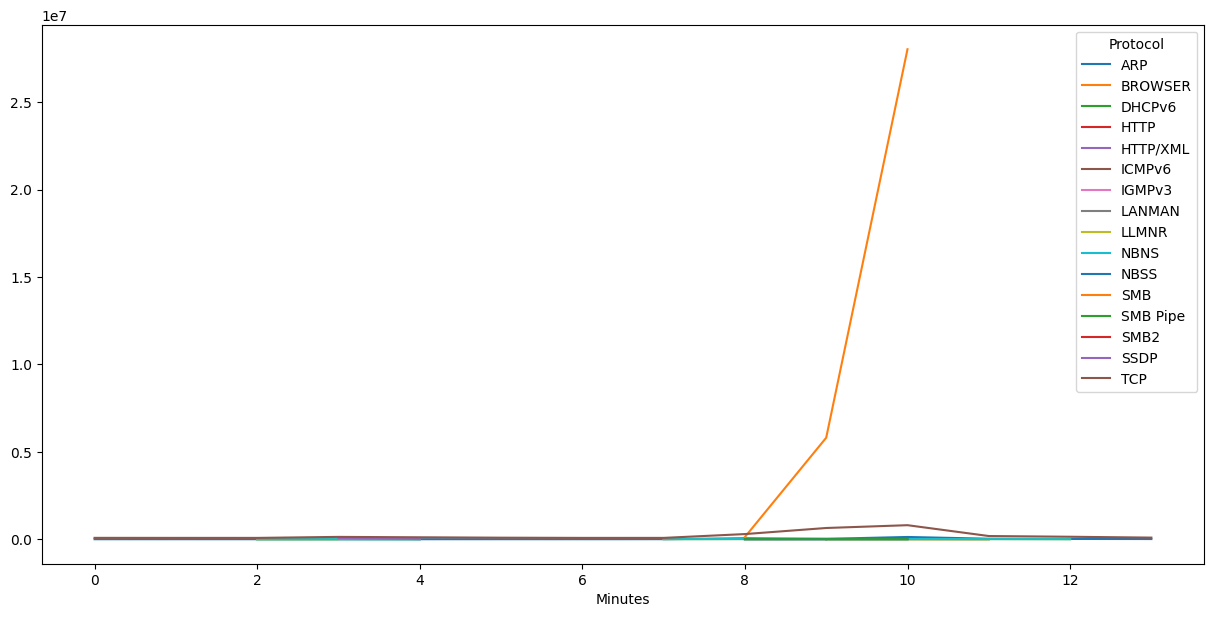

In [11]:
df3 = pd.DataFrame()
df3 = t2_data.copy()

df1 = data[['Minutes', 'Protocol', 'Length']]
fig, ax = plt.subplots(figsize=(15,7))
df3.groupby(['Minutes','Protocol']).sum()['Length'].unstack().plot(ax=ax)
df1

Text(0, 0.5, 'Counts')

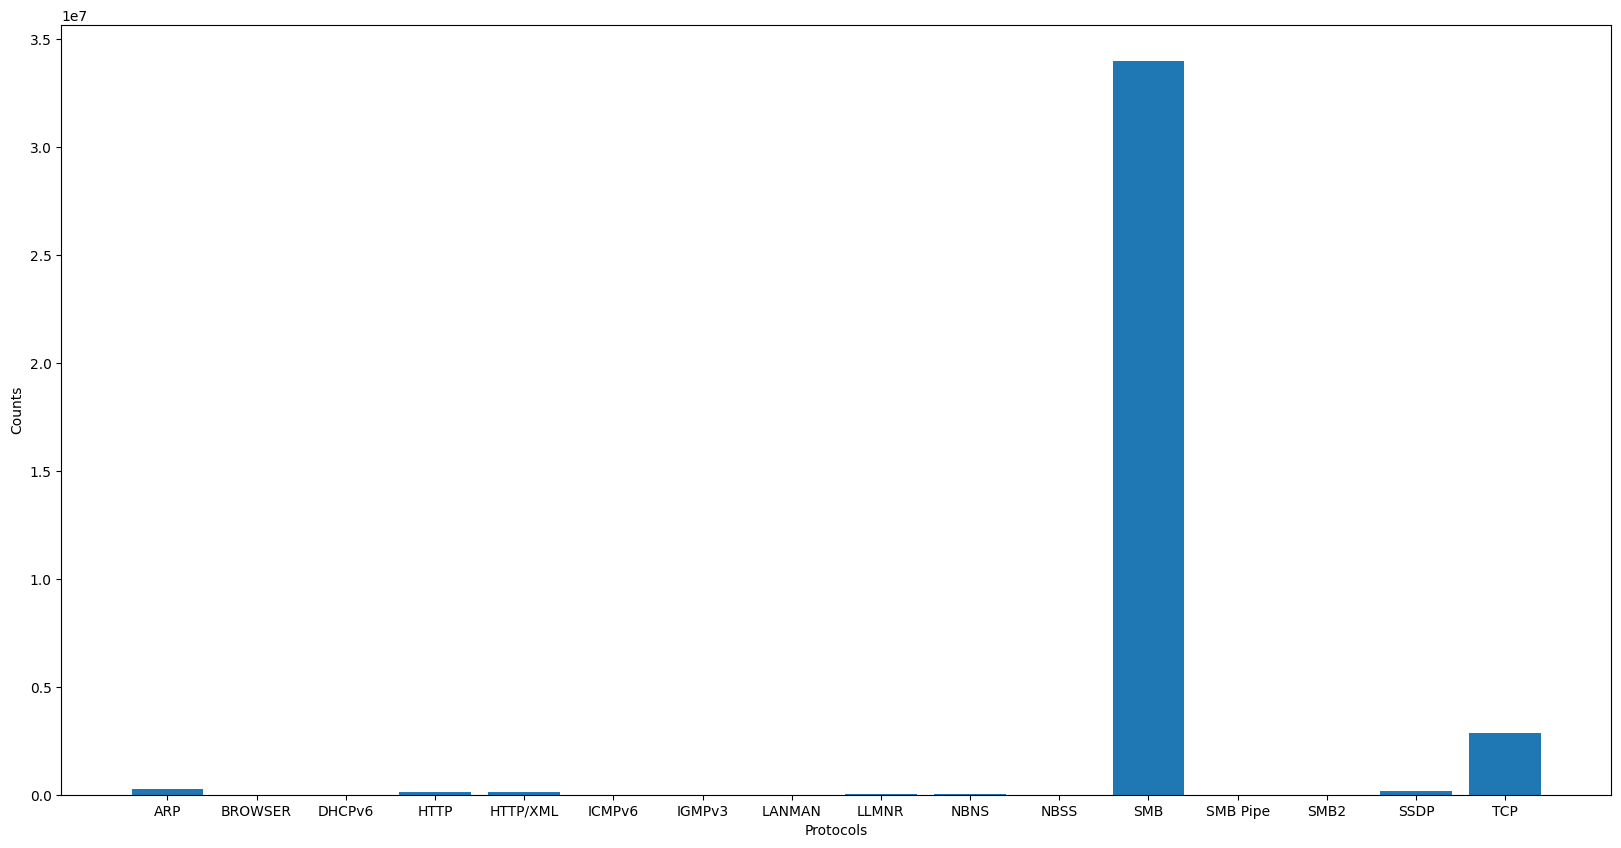

In [13]:
import matplotlib as pt
import numpy as np


pl_column = t2_data[['Protocol','Length']]

sum_pl = pl_column.groupby(['Protocol'])['Length'].sum()
sum_to_dict=sum_pl.to_dict()

plt.figure(figsize=(20,10))


plt.bar(sum_to_dict.keys(),sum_to_dict.values())

plt.xlabel('Protocols')
plt.ylabel('Counts')
